In [24]:
import pandas as pd
import numpy as np

# 1. Carga fichero


In [25]:
df_original = pd.read_csv("../Data\Raw\ds_salaries.csv")

In [26]:
df_original.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [27]:
import seaborn as sns

In [28]:
df_original["work_year"].unique()

array([2023, 2022, 2020, 2021], dtype=int64)

In [29]:
df_original["job_title"].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [30]:
df_original["employee_residence"].value_counts()

US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

In [31]:
df_original.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [32]:
df_original[df_original["employee_residence"] != df_original["company_location"]]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
81,2023,SE,FT,Machine Learning Engineer,150000,USD,150000,PT,100,US,M
82,2023,MI,FT,Applied Machine Learning Engineer,65000,EUR,69751,IN,100,DE,S
183,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
218,2023,SE,FT,Applied Data Scientist,100000,AUD,68318,AU,100,FI,M
249,2022,SE,FT,Data Scientist,84000,EUR,88256,ES,100,GB,L
...,...,...,...,...,...,...,...,...,...,...,...
3729,2021,EN,FT,AI Scientist,1335000,INR,18053,IN,100,AS,S
3731,2020,MI,FT,Data Scientist,55000,EUR,62726,FR,50,LU,S
3735,2021,EN,PT,AI Scientist,12000,USD,12000,BR,100,US,S
3743,2020,MI,FT,Data Engineer,130800,USD,130800,ES,100,US,M


In [46]:
#creacion columna trabajadores residentes o no de pais procedencia empresa

df_original['mismatch'] = np.where(df_original['employee_residence'] != df_original['company_location'], 1, 0)

<AxesSubplot:>

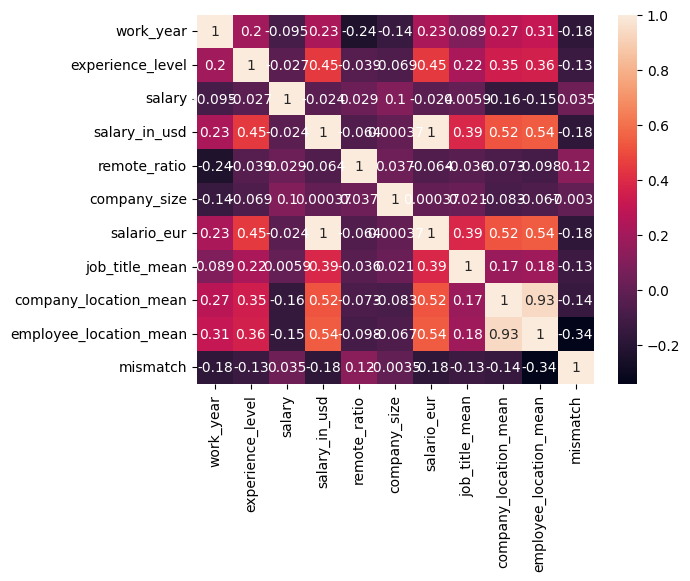

In [51]:
sns.heatmap(df_original.corr(), annot = True)

In [52]:
#El hecho de si el pais de residencia y el de precedencia de la compañia son el mismo no tiene correlacion con el salario, decidimos eliminar la variable




## Cambio usd a eur

In [33]:
tasa_cambio = 0.92

df_original["salario_eur"] = df_original["salary_in_usd"] * tasa_cambio

In [34]:
df_original

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salario_eur
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,78979.24
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,27600.00
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,23460.00
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,161000.00
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,110400.00
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,379040.00
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,138920.00
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,96600.00
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,92000.00


In [35]:
#groupby experiencia y salarios

exp_sal = df_original.groupby('experience_level')['salario_eur'].mean().round(2)

exp_sal

experience_level
EN     72262.58
EX    179336.46
MI     96163.86
SE    140806.99
Name: salario_eur, dtype: float64

In [36]:
# Reemplazar las etiquetas por los salarios medios correspondientes
df_original['experience_level'] = df_original['experience_level'].map(exp_sal)

In [37]:
# Mapear las etiquetas de tamaño de empresa a valores numéricos
mapping = {'S': 1, 'M': 2, 'L': 3}
df_original['company_size'] = df_original['company_size'].map(mapping)

In [42]:
#hacemos mean encoder para las variables de pais y job_title
mean_encoding_variable1 = df_original.groupby('job_title')['salario_eur'].mean()
df_original["job_title_mean"] = df_original['job_title'].map(mean_encoding_variable1)

In [43]:
#mean encoder paises

mean_encoding_variable2 = df_original.groupby('company_location')['salario_eur'].mean()
df_original["company_location_mean"] = df_original['company_location'].map(mean_encoding_variable2)

mean_encoding_variable3 = df_original.groupby('employee_residence')['salario_eur'].mean()
df_original["employee_location_mean"] = df_original['employee_residence'].map(mean_encoding_variable3)


In [53]:
#encoder label de employment_type y job_title
from sklearn.preprocessing import LabelEncoder
cols = ['employment_type']
df_original[cols]=df_original[cols].apply(LabelEncoder().fit_transform)

In [55]:
df_original.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'salario_eur',
       'job_title_mean', 'company_location_mean', 'employee_location_mean',
       'mismatch'],
      dtype='object')

In [57]:
#Eliminar variables redundantes.
df_original.drop(columns=["salary","salary_currency","salary_in_usd", "company_location", "employee_residence","mismatch"], inplace=True)


In [58]:
df_original.head()

,work_year,experience_level,employment_type,job_title,remote_ratio,company_size,salario_eur,job_title_mean,company_location_mean,employee_location_mean
0,2023,140806.99,2,Principal Data Scientist,100,3,78979.24,182317.435000,53061.979740,55626.282000
1,2023,96163.86,0,ML Engineer,100,1,27600.00,145684.245882,139676.248776,140596.250719
2,2023,96163.86,0,ML Engineer,100,1,23460.00,145684.245882,139676.248776,140596.250719
3,2023,140806.99,2,Data Scientist,100,2,161000.00,129600.184238,121364.274483,121645.073412
4,2023,140806.99,2,Data Scientist,100,2,110400.00,129600.184238,121364.274483,121645.073412


In [59]:
df_original.describe()

,work_year,experience_level,employment_type,remote_ratio,company_size,salario_eur,job_title_mean,company_location_mean,employee_location_mean
count,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000
mean,2022.373635,126564.760634,1.996538,46.271638,2.081491,126564.758690,126564.758690,126564.758690,126564.758690
std,0.691448,25885.525326,0.133550,48.589050,0.392071,58011.175256,22427.718301,30135.667375,31253.471707
min,2020.000000,72262.580000,0.000000,0.000000,1.000000,4721.440000,4976.280000,5799.680000,5799.680000
25%,2022.000000,96163.860000,2.000000,0.000000,2.000000,87400.000000,125732.803636,139676.248776,140596.250719
50%,2022.000000,140806.990000,2.000000,0.000000,2.000000,124200.000000,131362.875846,139676.248776,140596.250719
75%,2023.000000,140806.990000,2.000000,100.000000,2.000000,161000.000000,131362.875846,139676.248776,140596.250719
max,2023.000000,179336.460000,3.000000,100.000000,3.000000,414000.000000,345000.000000,249730.780000,389927.280000


## 2. Creación csv train y test


In [51]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_original, test_size=0.2, random_state=42)

In [52]:
print(test_df.shape)
print(train_df.shape)


(751, 9)
(3004, 9)


## 3.Creación csv

In [53]:
def csv(nombre_archivo, archivo_guardar):

    ruta_archivo = '../Data/' + nombre_archivo + '.csv'
    archivo_guardar.to_csv(ruta_archivo, index=False)

In [ ]:
csv("processed", df_original)

In [54]:
csv("test", test_df)

In [55]:
csv("train", train_df)